In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
data = pd.read_csv('supply_chain_data.csv')

In [ ]:
#data preprocessing
data['days_to_year_end'] = (pd.to_datetime('2025-12-31') - pd.to_datetime(data['production_date'])).dt.days
X = data[['material_stock', 'demand', 'days_to_year_end']]
y = data['delay']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#training random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
#predicting and evaluating the mean absolute erorr
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} days")

Mean Absolute Error: 1.27 days


In [9]:
threshold = 2  # Days
high_delay_idx = y_pred > threshold
suggestions = ["Increase material stock" if X_test[i, 0] < 0 else "Adjust schedule" 
               for i in range(len(y_pred)) if high_delay_idx[i]]
print("Sample Optimization Suggestions:", suggestions[:5])

Sample Optimization Suggestions: ['Increase material stock', 'Adjust schedule', 'Adjust schedule', 'Increase material stock', 'Increase material stock']


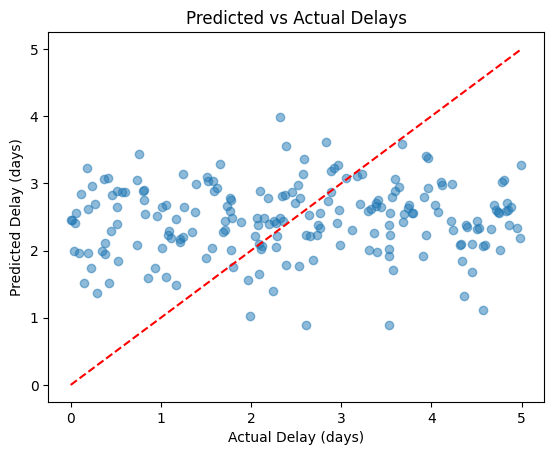

In [10]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')
plt.title("Predicted vs Actual Delays")
plt.xlabel("Actual Delay (days)")
plt.ylabel("Predicted Delay (days)")
plt.show()

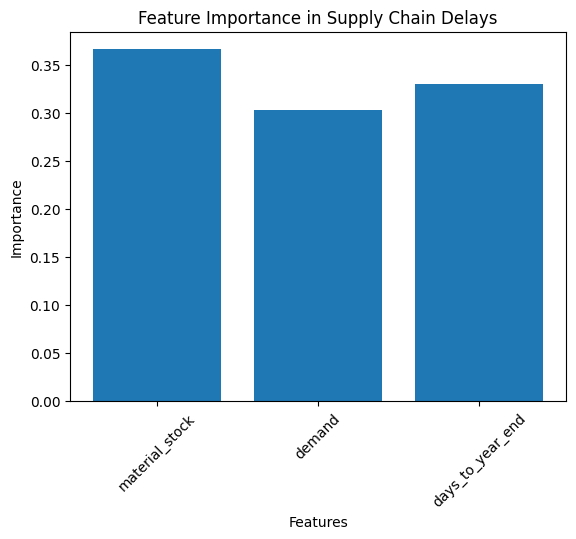

In [11]:
importance = model.feature_importances_
features = X.columns
plt.bar(features, importance)
plt.title("Feature Importance in Supply Chain Delays")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [15]:
new_batch = scaler.transform([[50, 150, 100]])  # Material stock, demand, days to year-end
prediction = model.predict(new_batch)
print(f"Predicted Delay: {prediction[0]:.2f} days")
print("Suggestion:", "Increase material stock" if prediction[0] > threshold else "No action needed")

Predicted Delay: 2.57 days
Suggestion: Increase material stock


c:\Users\jayas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  (
